In [1]:
# read and convert MVO data to MiniSEED
import os
import glob
import obspy
from SAM import RSAM
MVOdatadir = '/data/Montserrat/LaharStudy/MVOdata'
mseeddir = os.path.join(MVOdatadir, 'converted')
SDS_DIR = '/data/SDS'
SAM_DIR = '/data/SAM'
network = 'MV'

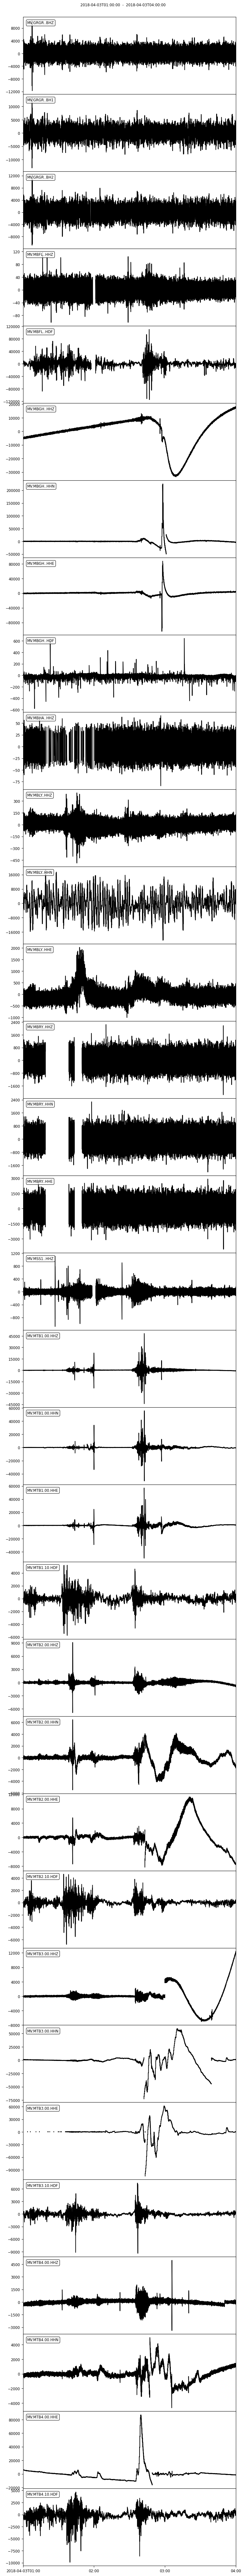

In [3]:
import numpy as np
from obspy.clients.filesystem.sds import Client as sdsclient
mySDSclient = sdsclient(SDS_DIR, sds_type='D', format='MSEED', fileborder_seconds=30, fileborder_samples=5000)
startTime = obspy.core.UTCDateTime(2018,4,3,1,0,0)
endTime = obspy.core.UTCDateTime(2018,4,3,4,0,0)
st = mySDSclient.get_waveforms(network, "*", "*", "[BHES]*", startTime, endTime)
for tr in st:
    tr.data = np.ma.masked_where(tr.data == 0, tr.data)
    all_traces = tr.split()
    st.remove(tr)
    for newtr in all_traces:
        st.append(newtr)
st.detrend('linear')
st.plot(equal_scale=False);

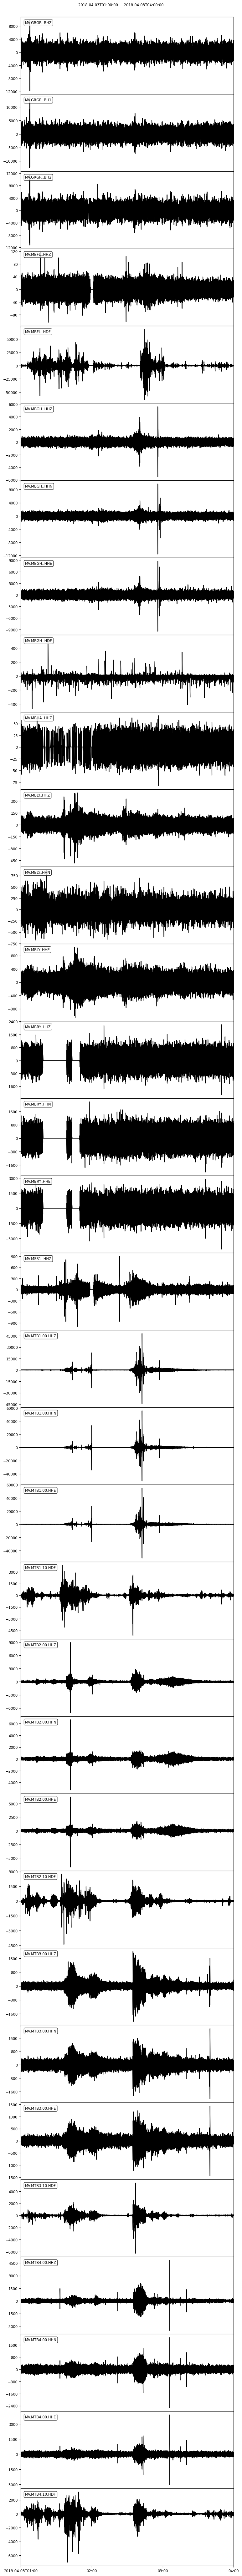

In [4]:
sampling_interval=10
st2 = st.copy()
st2.taper(max_percentage=0.1, max_length=sampling_interval*2)
st2.filter('highpass', freq=1/sampling_interval, corners=2, zerophase=True)
st2.merge(method=0, fill_value=0)
st2.plot(equal_scale=False);

In [1]:
rsamobj = RSAM(stream=st2, sampling_interval=sampling_interval, filter=None)
rsamobj.plot();

NameError: name 'RSAM' is not defined

In [ ]:
rsamobj.plot(metrics='median')

In [ ]:
rsamObj = RSAM.read(startTime, endTime, SAM_DIR=SAM_DIR, ext='pickle')
rsamObj = rsamObj.select(component='Z')

In [ ]:
rsamobj = RSAM(stream=st, sampling_interval=2)
rsamobj.plot();

In [ ]:
#rsamObj.plot(metrics='median')#, ylims=[0, 1000])
rsamhourly = rsamObj.downsample()

In [ ]:
rsamhourly.plot(metrics='min')

In [ ]:
rsamObj.plot(metrics='min') #, ylims=[-4, 4])

In [ ]:
rsamhourly.plot(metrics='fratio')

In [ ]:
rsamhourly.plot(metrics='LP')

In [ ]:
rsamhourly.plot(metrics='VT')

In [ ]:
rsamObj.plot(metrics='VT')

In [ ]:
rsamObj.plot(metrics='VLP')

In [ ]:
rsamhourly.plot(metrics='VLP')

In [ ]:
# need to verify. let us compute and plot RSAM directly.
from obspy.clients.filesystem.sds import Client as sdsclient
mySDSclient = sdsclient(SDS_DIR, sds_type='D', format='MSEED', fileborder_seconds=30, fileborder_samples=5000)
secondsPerDay = 60 * 60 * 24
numDays = (endTime-startTime)/secondsPerDay
daytime = startTime
while daytime < endTime:
    print(f'Loading Stream data for {daytime.strftime("%Y-%m-%d")}')
    st = mySDSclient.get_waveforms(network, "*", "00", "H*", daytime, daytime+secondsPerDay)
    print(st)
    print(f'- got {len(st)} Trace ids')
    if len(st)>0:
        print(f'Computing RSAM metrics for {daytime}, and saving to pickle files')
        rsam24h = RSAM(stream=st, sampling_interval=60)
        rsam24h.write(SAM_DIR, ext='csv', overwrite=True)
    daytime += secondsPerDay

In [ ]:
rsamObj2 = RSAM.read(startTime, endTime, SAM_DIR=SAM_DIR, ext='csv')
rsamObj2 = rsamObj2.select(component='Z')
rsamObj2.plot()

In [ ]:
rsamhourly2 = rsamObj2.downsample()
rsamhourly2.plot()

In [ ]:
rsamObj = RSAM.read(startTime, endTime, SAM_DIR=SAM_DIR, ext='pickle')
rsamObj = rsamObj.select(component='Z')
rsamhourly = rsamObj.downsample()
rsamhourly.plot()

In [ ]:
st = obspy.read('/data/SDS/2018/MV/BLV01/HHZ.D/MV.BLV01.00.HHZ.D.2018.082', format='MSEED')
st.plot(type='dayplot');

In [ ]:
# convert the MVOdata to SDS
print(SDS_DIR)